In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from snsphd import viz
import math
import orjson
Colors, pallet = viz.phd_style(jupyterStyle = True, grid = True, axese_width=0.5, text = 6, svg_mode=True)

from enum import Enum
from dataclasses import dataclass, fields, field, _MISSING_TYPE 

from load_schema import Decode, Result

import matplotlib as mpl
import os

# set the DPI for all figures
mpl.rcParams['figure.dpi'] = 100

from snsphd.layout import bisect

In [2]:
with open("../inter/decode_20GHz26.0.json", "r") as f:
    data = orjson.loads(f.read())
    decode = Decode(**data)

db_values = np.arange(16,50, 2).tolist()
print(db_values)

# need type hints for intellisense to work
def decode_from_folder(folder_path: str, db_values: list[int]) -> list[Decode]:
    decodes = []
    for db in db_values:
        filename = f"decode_20GHz{db}.0.json"
        filepath = os.path.join(folder_path, filename)
        with open(filepath, "r") as f:
            data = orjson.loads(f.read())
            decode = Decode(**data)
            decodes.append(decode)
    return decodes

decodes = decode_from_folder("../inter", db_values)

[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


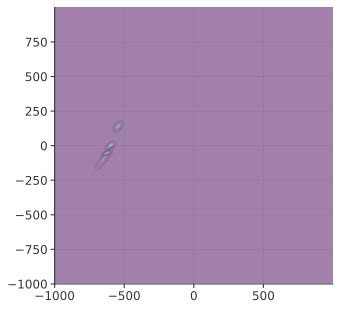

In [27]:
from matplotlib.patches import Ellipse
from load_schema import GMData

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in np.linspace(0,4, 8):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, fill=False, edgecolor='black', alpha=0.3))
        

def plot_gmm(ax, gm_data: GMData, label=True, data_alpha=0.2, **ellipse_kwargs):
    
    
    w_factor = 0.2 / gm_data.weights.max()
    for pos, covar, w in zip(gm_data.means, gm_data.covariances, gm_data.weights):
        draw_ellipse(pos, covar, alpha=w * w_factor, **ellipse_kwargs, ax=ax)



dB_idx = 5
components_idx = 0



x = decodes[dB_idx].hist_data.counts[:,0]
y = decodes[dB_idx].hist_data.counts[:,1]
bins = decodes[dB_idx].hist_data.bins


# print(gm_data_current)

fig, ax = plt.subplots(1,1, figsize=(5,5))


hist, bins = np.histogram2d(x, y, bins=bins)
# _ = ax.hist2d(x, y, bins=bins, alpha=0.5, density=True, rasterized=True)
hist_means_x = np.mean(hist, axis=0)
hist_means_y = np.mean(hist, axis=1)

gm_data_current = decodes[dB_idx].gm_data.gm_list[components_idx]

gm_data_current.means[0] += hist_means_x
gm_data_current.means[1] += hist_means_y

plot_gmm(ax, gm_data_current)
ax.imshow(hist[0], extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin='lower')

x_mean = 

ax.set_ylim(-400, 500)
# ax.set_xlim(-900, -200)

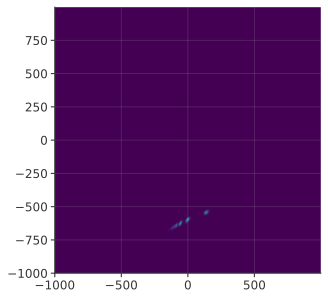

In [14]:
idx = 5

x = decodes[idx].hist_data.counts[:,0]
y = decodes[idx].hist_data.counts[:,1]
bins = decodes[idx].hist_data.bins


hist = np.histogram2d(x, y, bins=bins)
fig, ax = plt.subplots()
ax.imshow(hist[0], extent=[hist[1][0], hist[1][-1], hist[2][0], hist[2][-1]], origin='lower')

In [8]:
len(decodes[1].hist_data.counts)

89640